In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
number_units_df = pd.read_csv("Resources/Number_of_Units_Concat.csv")
number_units_df = number_units_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})

columns = ['Bachelor', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total']
  
number_units_df[columns] = number_units_df[columns].astype(float)

number_units_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,1.0,22.0,16.0,16.0,55.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,203.0,641.0,1015.0,107.0,1966.0,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,46.0,21.0,0.0,67.0,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,149.0,427.0,859.0,126.0,1561.0,2018
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,64.0,6.0,70.0,2018


In [16]:
number_units_trend_df = number_units_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

number_units_trend_df = number_units_trend_df[(number_units_trend_df['Province'].isin(provinces_for_trend))]

number_units_trend_df = pd.pivot_table(number_units_trend_df, index='Year', columns='Province', aggfunc='sum', fill_value=0).reset_index()

number_units_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

number_units_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,125018,148683,633166,766973,29014
1,2019,127060,152300,636983,777659,29475
2,2020,130780,156437,646239,795158,30218
3,2021,137847,158830,651970,811856,30888
4,2022,144660,164334,665100,828006,31770


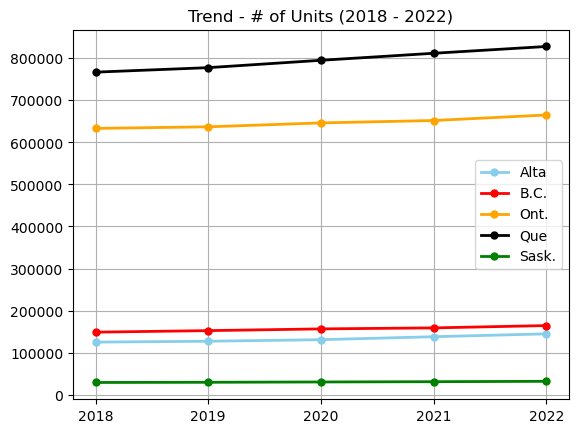

In [17]:
#plot Rent Trend:
plt.plot( 'Year', 'Alta', data=number_units_trend_df, marker='o', markerfacecolor='skyblue', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'Year', 'B.C.', data=number_units_trend_df, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)

plt.plot( 'Year', 'Ont.', data=number_units_trend_df, marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot( 'Year', 'Que', data=number_units_trend_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.plot( 'Year', 'Sask.', data=number_units_trend_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Trend - # of Units (2018 - 2022)")
plt.grid()
plt.legend()

plt.show()

In [18]:
number_units_df_2022 = number_units_df[(number_units_df['Year']==2022)].copy()

number_units_summary_bachelor = number_units_df_2022.groupby(["Province"]).sum(numeric_only=True)["Bachelor"]
number_units_summary_one_bedroom = number_units_df_2022.groupby(["Province"]).sum(numeric_only=True)["1 Bedroom"]
number_units_summary_two_bedroom = number_units_df_2022.groupby(["Province"]).sum(numeric_only=True)["2 Bedroom"]
number_units_summary_three_bedroom_plus = number_units_df_2022.groupby(["Province"]).sum(numeric_only=True)["3 Bedroom +"]
number_units_summary_three_bedroom_total = number_units_df_2022.groupby(["Province"]).sum(numeric_only=True)["Total"]

number_units_summary_2022 = pd.concat([number_units_summary_bachelor, number_units_summary_one_bedroom, number_units_summary_two_bedroom,
                                number_units_summary_three_bedroom_plus, number_units_summary_three_bedroom_total]
                               , axis=1)

number_units_summary_2022.columns = ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom +","Total"]
number_units_summary_2022

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
Province,,,,,
Alta,6156.0,56662.0,67375.0,14467.0,144660.0
B.C.,17921.0,92722.0,47835.0,5856.0,164334.0
Man.,4174.0,31765.0,30543.0,3887.0,70369.0
N.B.,886.0,5936.0,16399.0,2216.0,25437.0
N.S.,2798.0,18115.0,30071.0,4467.0,55451.0
Nfld.Lab.,448.0,1395.0,2230.0,314.0,4387.0
Ont.,39091.0,255264.0,304603.0,66142.0,665100.0
Que,58815.0,208113.0,457159.0,103919.0,828006.0
Sask.,1287.0,11119.0,17093.0,2271.0,31770.0


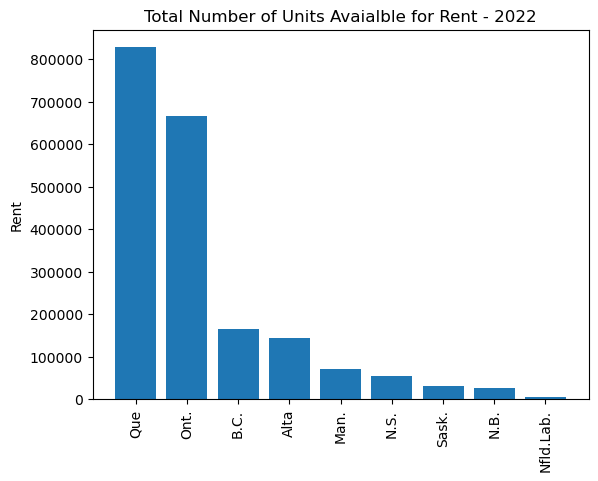

In [19]:
#plot Total:
number_units_summary = number_units_summary_2022.sort_values(by="Total", ascending=False)
x = number_units_summary.index
y = number_units_summary['Total']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Total Number of Units Avaialble for Rent - 2022")

plt.show()

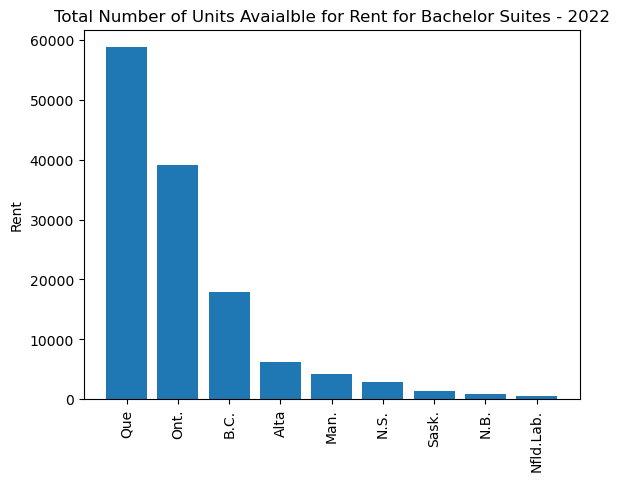

In [20]:
#plot 1:
number_units_summary = number_units_summary_2022.sort_values(by="Bachelor", ascending=False)
x = number_units_summary.index
y = number_units_summary['Bachelor']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Total Number of Units Avaialble for Rent for Bachelor Suites - 2022")

plt.show()

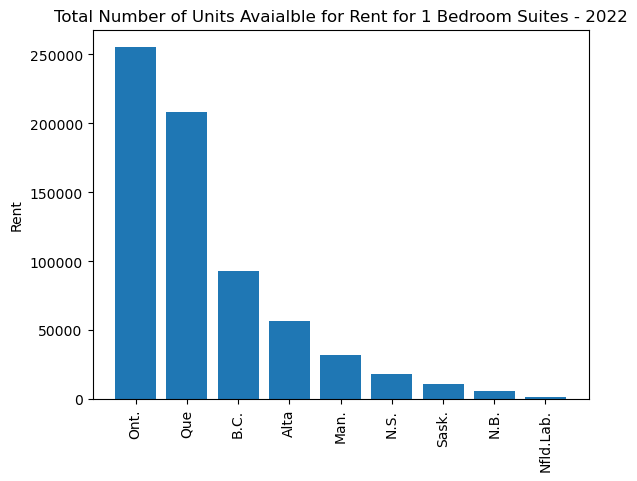

In [21]:
#plot 2:
number_units_summary = number_units_summary_2022.sort_values(by="1 Bedroom", ascending=False)
x = number_units_summary.index
y = number_units_summary['1 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Total Number of Units Avaialble for Rent for 1 Bedroom Suites - 2022")

plt.show()

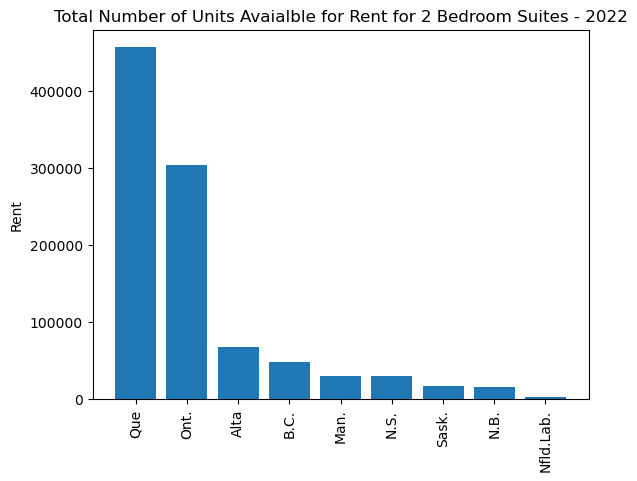

In [22]:
#plot 3:
number_units_summary = number_units_summary_2022.sort_values(by="2 Bedroom", ascending=False)
x = number_units_summary.index
y = number_units_summary['2 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Total Number of Units Avaialble for Rent for 2 Bedroom Suites - 2022")

plt.show()

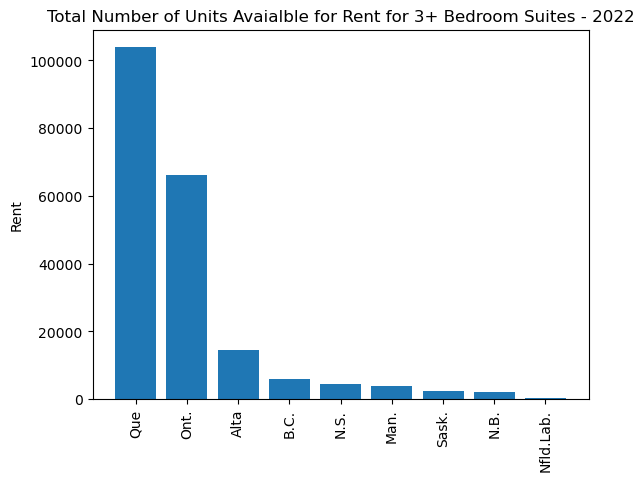

In [23]:
#plot 4:
number_units_summary = number_units_summary_2022.sort_values(by="3 Bedroom +", ascending=False)
x = number_units_summary.index
y = number_units_summary['3 Bedroom +']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Total Number of Units Avaialble for Rent for 3+ Bedroom Suites - 2022")

plt.show()

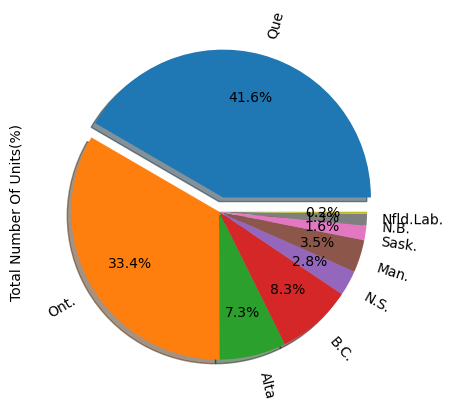

In [27]:
# Generate a pie plot showing the distribution of Province versus Number of Units(2022) using pyplot
plt.ylabel('Total Number Of Units(%)')
myexplode = [0.1,0,0,0,0,0,0,0,0]

plt.pie(number_units_summary["Total"], labels = number_units_summary.index, rotatelabels = True, explode = myexplode, startangle = 0, shadow = True, autopct='%.1f%%', pctdistance=0.7)
plt.show()